<a href="https://colab.research.google.com/github/sandipanpaul21/Clustering-in-Python/blob/master/20_K_Modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Custering** is an *unsupervised learning* method whose task is to *divide the population or data points into a number of groups*, such that data points in a group are more similar to other data points in the same group and dissimilar to the data points in other groups. 

It is basically a collection of objects based on similarity and dissimilarity between them.

**KMeans** uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar our data points are. Centroids are updated by Means.

**But for categorical data points**, we cannot calculate the distance. So we go for **KModes algorithm**. It uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are. It uses Modes instead of means.

**Steps in K-Mode**:
1. Pick K observations at random and use them as leaders/clusters (K to choose from Elbow Method)
2. Calculate the dissimilarities and assign each observation to its closest cluster
3. Define new modes for the clusters
4. Repeat 2–3 steps until there are is no re-assignment required

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
#!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create toy dataset
hair_color = np.array(['blonde', 'brunette', 'red', 'black', 'brunette', 'black', 'red', 'black'])
eye_color = np.array(['amber', 'gray', 'green', 'hazel', 'amber', 'gray', 'green', 'hazel'])
skin_color = np.array(['fair', 'brown', 'brown', 'brown', 'fair', 'brown', 'fair', 'fair'])
person = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':person, 'hair_color':hair_color, 'eye_color':eye_color, 'skin_color':skin_color})
data = data.set_index('person')
data

,hair_color,eye_color,skin_color
person,,,
P1,blonde,amber,fair
P2,brunette,gray,brown
P3,red,green,brown
P4,black,hazel,brown
P5,brunette,amber,fair
P6,black,gray,brown
P7,red,green,fair
P8,black,hazel,fair


**Scree Plot or Elbow curve to find optimal K value**
- For KModes, plot cost for a range of K values. Cost is the sum of all the dissimilarities between the clusters.
- Select the K where you observe an elbow-like bend with a lesser cost value.



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 15.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 

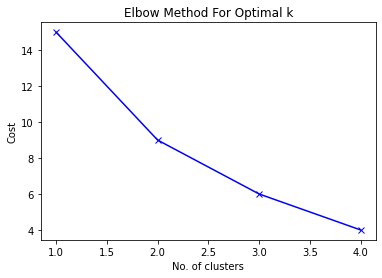

In [3]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [4]:
# Elbow Curve
# We can see a bend at K=3 in the above graph indicating 3is the optimal number of clusters.
# Build a model with 3 clusters

# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 7.0
Run 1, iteration: 2/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 6.0
Run 3, iteration: 2/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 8.0
Run 4, iteration: 2/100, moves: 1, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 8.0
Best run was number 3


array([1, 0, 2, 0, 1, 0, 2, 0], dtype=uint16)

In [5]:
# Finally, insert the predicted cluster values in our original dataset.

data.insert(0, "Cluster", clusters, True)
data

,Cluster,hair_color,eye_color,skin_color
person,,,,
P1,1,blonde,amber,fair
P2,0,brunette,gray,brown
P3,2,red,green,brown
P4,0,black,hazel,brown
P5,1,brunette,amber,fair
P6,0,black,gray,brown
P7,2,red,green,fair
P8,0,black,hazel,fair


Inference from the model predictions: P1, P2, P5 are merged as a cluster; P3, P7 are merged; and P4, P6, P8 are merged.

The results of our theoretical approach are in line with the model predictions. 🙌